In [2]:
import numpy as np

In [14]:
data = np.loadtxt('data/cities.dat', delimiter=",", comments = ";", skiprows=4, dtype=float)

print(data)

[[ 0.4     0.4439]
 [ 0.2439  0.1463]
 [ 0.1707  0.2293]
 [ 0.2293  0.761 ]
 [ 0.5171  0.9414]
 [ 0.8732  0.6536]
 [ 0.6878  0.5219]
 [ 0.8488  0.3609]
 [ 0.6683  0.2536]
 [ 0.6195  0.2634]]


[[ 0.4     0.4439]
 [ 0.2439  0.1463]
 [ 0.1707  0.2293]
 [ 0.2293  0.761 ]
 [ 0.5171  0.9414]
 [ 0.8732  0.6536]
 [ 0.6878  0.5219]
 [ 0.8488  0.3609]
 [ 0.6683  0.2536]
 [ 0.6195  0.2634]]


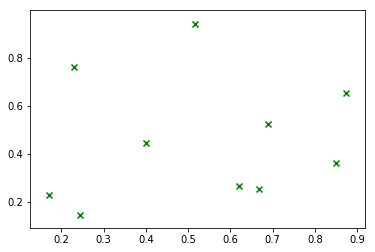

In [86]:
# Let's have a look at the data

print(data)

## Scatter Plot
import matplotlib.pyplot as plt
plt.scatter(data[:,0], data[:,1], marker = "x", c = 'g')
plt.show()

In [148]:
class SOM:
    def __init__(self): 
        # Weights 10 nodes, 2 inputs
        self.weights = np.random.rand(10, 2)
        self.nsize = 5
        self.visited = []
        
    def similarity(self, data, weight):
        distance = data - weight
        
        # similarity is the length of the distance vector!
        return np.dot(distance.T, distance)

    def get_winner(self, data):
        # Returns the index of the winning node(weight), the most similar node to the input data
        similarities = np.array([])
        for i, weight in enumerate(self.weights):
            similarities = np.append(similarities, self.similarity(data, weight))
        
        for index in self.visited: 
            similarities[index] = np.inf
        winner = np.argmin(similarities)
                
        return winner # returns the index of the minimum weight

    def train(self, epochs=20):
        #For each sample in input
        for epoch in range(epochs):
            for i, sample in enumerate(data): 
                # For each animal you will have to pick out the corresponding row from the props matrix.
                
                # Then find the row of the weight matrix with the shortest distance to this attribute vector
                # aka the winner
                winner = self.get_winner(sample)
                
                # Once you have the index to the winning node, it is time to update the weights.
                neighbours = self.get_neighbours(winner) #Get list of neighbours with winnerNode in center
      
                self.update_weights(neighbours, sample)

            # Update neighbourhood size
            if i <= 5:
                self.nsize = 1
            elif self.nsize < 2:
                self.nsize -= 0
                
    def get_neighbours(self, winner):
        # returns the neighbourhood around the winner
        neighbours = []
        i = 1
        
        neighbours.append(winner) # assuming we want to update the neighbour as well
        
        while (len(neighbours) < self.nsize):
            # %10 makes the neighbourhood circular
            neighbours.append((winner - i)%10)
            neighbours.append((winner + i)%10)
            i += 1
        
        return np.array(neighbours)


    def update_weights(self, neighbours, sample, lr = 0.2):
        # Update weights of all neighbours to become slightly more similar to the input pattern (sample)
        for i in neighbours:
            self.weights[i] = self.weights[i] + lr * (sample - self.weights[i])
    
    def predict(self):
        path=[]
        #Loop through animals
        path.append((0, data[0][0], data[0][1]))
        for i in range(data.shape[0]):
                winner = self.get_winner(data[i]) #Find best node
                path.append((winner, data[i][0], data[i][1]))

        path = np.array(path,dtype=object)
        path = path[path[:,0].argsort()]
        return(path)

        #for i in range(pos.shape[0]):
        #plt.plot(pos[:,1],pos[:,2],linestyle='-', marker='o',color="b")
        #path = Path(pos[:,1:])
        #plt.plot(path) #spara denna
        #plt.show()

[[0 0.40000000000000002 0.44390000000000002]
 [0 0.40000000000000002 0.44390000000000002]
 [0 0.24390000000000001 0.14630000000000001]
 [0 0.17069999999999999 0.2293]
 [1 0.2293 0.76100000000000001]
 [3 0.5171 0.94140000000000001]
 [4 0.87319999999999998 0.65359999999999996]
 [5 0.68779999999999997 0.52190000000000003]
 [6 0.8488 0.3609]
 [7 0.66830000000000001 0.25359999999999999]
 [8 0.61950000000000005 0.26340000000000002]]
[0.40000000000000002 0.40000000000000002 0.24390000000000001
 0.17069999999999999 0.2293 0.5171 0.87319999999999998 0.68779999999999997
 0.8488 0.66830000000000001 0.61950000000000005]
[0.44390000000000002 0.44390000000000002 0.14630000000000001 0.2293
 0.76100000000000001 0.94140000000000001 0.65359999999999996
 0.52190000000000003 0.3609 0.25359999999999999 0.26340000000000002]


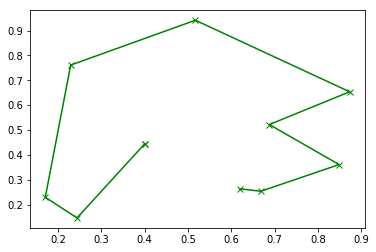

In [151]:
model = SOM()
model.train()  
path = model.predict()
print(path)


print(path[:,1])
print(path[:,2])

import matplotlib.pyplot as plt
plt.show()
plt.plot(path[:,1], path[:,2], c = 'g', marker = 'x')

plt.show()